In [1]:
import pandas as pd
%matplotlib inline
from dirtyclean import clean
import numpy as np
import glob

# Reading in the EmoLex

I'm just copying this from the other notebook! It's the one at the very bottom that does a lot of reshaping. I think it's the easiest to work with.

In [2]:
filepath = "NRC-Emotion-Lexicon-v0.92/NRC-emotion-lexicon-wordlevel-alphabetized-v0.92.txt"
emolex_df = pd.read_csv(filepath,  names=["word", "emotion", "association"], skiprows=45, sep='\t')
emolex_df = emolex_df.pivot(index='word', columns='emotion', values='association').reset_index()
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


## Reading in Medium articles



In [3]:
df = pd.read_csv("top_10.csv")

In [4]:
df.head()

,author,body,filename,followers,description,claps,people_clapped,min_read,high_text,author_date,date,images
0,Josh Spector,"You’re busy, so I’ll keep this quick.\nFollowi...",3.The Two Minutes It Takes To Read This Will I...,27000,Writer. Strategist. For The Interested newslet...,25191,17953,2,Delete the word “that.”,Apr 2017,"Jul 22, 2016",Yes
1,Trent Lapinski,rump Is What Happens When You Nominate A Cheat...,"8.Dear Democrats, Read This If You Do Not Unde...",13400,Tech Entrepreneur. Journalist. Technologist. C...,10885,9981,5,"This is the problem with America today, the te...",NaN,"Nov 9, 2016",Yes
2,Shem Magnezi,"That’s right, I said it.\n\nFuck your startup ...",2.Fuck You Startup World,6200,Doing what I love,22661,17316,5,You should celebrate any day that you don’t ha...,NaN,"Oct 11, 2016",Yes
3,Tobias Stone,It seems we’re entering another of those stupi...,1.History tells us what may happen next with B...,27000,"Writing about politics, history, and society. ...",18983,17092,7,We need to find a way to bridge from our close...,Aug 2017,"Jul 23, 2016",Yes
4,Max Braun,When I couldn’t buy a smart mirror and made on...,10.My Bathroom Mirror Is Smarter Than Yours,7400,Inevitable technology. Lately robots at X.,10353,9506,3,Maybe I’ll post a more detailed making-of with...,NaN,"Jan 30, 2016",Yes


In [5]:
df = df.rename(columns={'body': 'content'})

In [6]:
df.content = df.content.apply(str)

In [7]:
df["content"] = df["content"].apply(clean)

In [8]:
df.shape

(10, 12)

In [9]:
df.head()

,author,content,filename,followers,description,claps,people_clapped,min_read,high_text,author_date,date,images
0,Josh Spector,You re busy so I ll keep this quick Following ...,3.The Two Minutes It Takes To Read This Will I...,27000,Writer. Strategist. For The Interested newslet...,25191,17953,2,Delete the word “that.”,Apr 2017,"Jul 22, 2016",Yes
1,Trent Lapinski,rump Is What Happens When You Nominate A Cheat...,"8.Dear Democrats, Read This If You Do Not Unde...",13400,Tech Entrepreneur. Journalist. Technologist. C...,10885,9981,5,"This is the problem with America today, the te...",NaN,"Nov 9, 2016",Yes
2,Shem Magnezi,That s right I said it Fuck your startup scene...,2.Fuck You Startup World,6200,Doing what I love,22661,17316,5,You should celebrate any day that you don’t ha...,NaN,"Oct 11, 2016",Yes
3,Tobias Stone,It seems we re entering another of those stupi...,1.History tells us what may happen next with B...,27000,"Writing about politics, history, and society. ...",18983,17092,7,We need to find a way to bridge from our close...,Aug 2017,"Jul 23, 2016",Yes
4,Max Braun,When I couldn t buy a smart mirror and made on...,10.My Bathroom Mirror Is Smarter Than Yours,7400,Inevitable technology. Lately robots at X.,10353,9506,3,Maybe I’ll post a more detailed making-of with...,NaN,"Jan 30, 2016",Yes


In [10]:
emolex_df['word'].head(3)

0      aback
1     abacus
2    abandon
Name: word, dtype: object

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# I only want you to look for words in the emotional lexicon
# because we don't know what's up with the other words
vec = TfidfVectorizer(vocabulary=emolex_df.word,
                      use_idf=False, 
                      norm='l1') # ELL - ONE
matrix = vec.fit_transform(df['content'])
vocab = vec.get_feature_names()
wordcount_df = pd.DataFrame(matrix.toarray(), columns=vocab)
wordcount_df.head()

,aback,abacus,abandon,abandoned,abandonment,abate,abatement,abba,abbot,abbreviate,...,zephyr,zeppelin,zest,zip,zodiac,zone,zoo,zoological,zoology,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001672
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


In [12]:
emolex_df.head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,0,0,1,0,1,0,1,0,0
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0


In [13]:
emolex_df[emolex_df.anger == 1].head()

emotion,word,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
3,abandoned,1,0,0,1,0,1,0,1,0,0
4,abandonment,1,0,0,1,0,1,0,1,1,0
17,abhor,1,0,1,1,0,1,0,0,0,0
18,abhorrent,1,0,1,1,0,1,0,0,0,0
27,abolish,1,0,0,0,0,1,0,0,0,0


In [14]:
# Get your list of positive words

angry_words = emolex_df[emolex_df.anger == 1]['word']

positive_words = emolex_df[emolex_df.positive == 1]['word']


# Get your list of sadness words
sadness_words = emolex_df[emolex_df.sadness == 1]['word']


# Get your list of surprise words
surprise_words = emolex_df[emolex_df.surprise == 1]['word']


# Get your list of disgust words
disgust_words = emolex_df[emolex_df.disgust == 1]['word']


# Get your list of anticipation words
anticipation_words = emolex_df[emolex_df.anticipation == 1]['word']


# Get your list of negative words
negative_words = emolex_df[emolex_df.negative == 1]['word']



# Get your list of joy words
joy_words = emolex_df[emolex_df.joy == 1]['word']


# Get your list of trust words
trust_words = emolex_df[emolex_df.trust == 1]['word']



# Get your list of fear words
fear_words = emolex_df[emolex_df.fear == 1]['word']




In [15]:
df.head(3)

,author,content,filename,followers,description,claps,people_clapped,min_read,high_text,author_date,date,images
0,Josh Spector,You re busy so I ll keep this quick Following ...,3.The Two Minutes It Takes To Read This Will I...,27000,Writer. Strategist. For The Interested newslet...,25191,17953,2,Delete the word “that.”,Apr 2017,"Jul 22, 2016",Yes
1,Trent Lapinski,rump Is What Happens When You Nominate A Cheat...,"8.Dear Democrats, Read This If You Do Not Unde...",13400,Tech Entrepreneur. Journalist. Technologist. C...,10885,9981,5,"This is the problem with America today, the te...",NaN,"Nov 9, 2016",Yes
2,Shem Magnezi,That s right I said it Fuck your startup scene...,2.Fuck You Startup World,6200,Doing what I love,22661,17316,5,You should celebrate any day that you don’t ha...,NaN,"Oct 11, 2016",Yes


In [16]:
df['anger'] = wordcount_df[angry_words].sum(axis=1)

df['positivity'] = wordcount_df[positive_words].sum(axis=1)


df['joy'] = wordcount_df[joy_words].sum(axis=1)


df['disgust'] = wordcount_df[disgust_words].sum(axis=1)



df['surprise'] = wordcount_df[surprise_words].sum(axis=1)

df['trust'] = wordcount_df[trust_words].sum(axis=1)


df['anticipation'] = wordcount_df[anticipation_words].sum(axis=1)


df['sadness'] = wordcount_df[sadness_words].sum(axis=1)

df['negative'] = wordcount_df[negative_words].sum(axis=1)

df['fear'] = wordcount_df[fear_words].sum(axis=1)




In [51]:
df.head(10)

,author,content,filename,followers,description,claps,people_clapped,min_read,high_text,author_date,...,anger,positivity,joy,disgust,surprise,trust,anticipation,sadness,negative,fear
0,Josh Spector,You re busy so I ll keep this quick Following ...,3.The Two Minutes It Takes To Read This Will I...,27000,Writer. Strategist. For The Interested newslet...,25191,17953,2,Delete the word “that.”,Apr 2017,...,0.203704,0.277778,0.092593,0.148148,0.037037,0.185185,0.185185,0.166667,0.296296,0.185185
1,Trent Lapinski,rump Is What Happens When You Nominate A Cheat...,"8.Dear Democrats, Read This If You Do Not Unde...",13400,Tech Entrepreneur. Journalist. Technologist. C...,10885,9981,5,"This is the problem with America today, the te...",NaN,...,0.051502,0.253219,0.055794,0.021459,0.077253,0.111588,0.081545,0.051502,0.133047,0.060086
2,Shem Magnezi,That s right I said it Fuck your startup scene...,2.Fuck You Startup World,6200,Doing what I love,22661,17316,5,You should celebrate any day that you don’t ha...,NaN,...,0.064677,0.208955,0.079602,0.054726,0.014925,0.079602,0.094527,0.039801,0.149254,0.064677
3,Tobias Stone,It seems we re entering another of those stupi...,1.History tells us what may happen next with B...,27000,"Writing about politics, history, and society. ...",18983,17092,7,We need to find a way to bridge from our close...,Aug 2017,...,0.123746,0.140468,0.030100,0.068562,0.045151,0.073579,0.081940,0.096990,0.239130,0.133779
4,Max Braun,When I couldn t buy a smart mirror and made on...,10.My Bathroom Mirror Is Smarter Than Yours,7400,Inevitable technology. Lately robots at X.,10353,9506,3,Maybe I’ll post a more detailed making-of with...,NaN,...,0.008621,0.112069,0.025862,0.025862,0.000000,0.077586,0.068966,0.017241,0.068966,0.025862
5,Hillary Clinton [parody],What the fuck is your problem America I m Hill...,6.Let Me Remind You Fuckers Who I Am,12500,"45th President of the United States, patriarch...",12081,11415,4,“Oh but what about your eeeemaaaaillls???” Shu...,NaN,...,0.111111,0.234568,0.092593,0.086420,0.030864,0.104938,0.123457,0.061728,0.197531,0.104938
6,Jose Aguinaga,No JavaScript frameworks were created during t...,4.How it feels to learn JavaScript in 2016,8700,Web Engineer.,33715,18783,13,"I need to display data on a page, not perform ...",May 2017,...,0.061962,0.184165,0.044750,0.024096,0.020654,0.082616,0.087780,0.020654,0.061962,0.065404
7,Jose Aguinaga,It s easier to fool people than to convince th...,7.How Technology is Hijacking Your Mind — from...,15100,"Co-founder, Center for Humane Technology // Ex...",21025,12638,16,"We need our smartphones, notifications screens...",Jul 2017,...,0.032487,0.183756,0.038579,0.011168,0.045685,0.108629,0.073096,0.037563,0.102538,0.050761
8,David Hopkins,I want to discuss a popular TV show my wife an...,5.How a TV Sitcom Triggered the Downfall of We...,9800,I write a little bit of everything—short stori...,18489,15529,6,I see Kim Kardashian’s ass at the top of CNN.c...,Sep 2017,...,0.081579,0.244737,0.078947,0.065789,0.063158,0.152632,0.121053,0.073684,0.184211,0.100000
9,Tristan de Montebello,Almost every day I sit down in a coffee shop i...,9.What are people working on in coffee shops,2600,I teach adult beginners how to learn guitar in...,10395,9720,5,It felt absolutely amazing to connect with all...,NaN,...,0.008929,0.276786,0.111607,0.004464,0.053571,0.107143,0.116071,0.022321,0.035714,0.017857


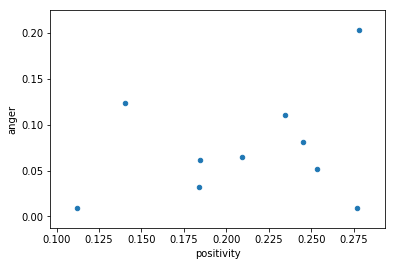

In [17]:
df.plot(x='positivity', y='anger', kind='scatter')

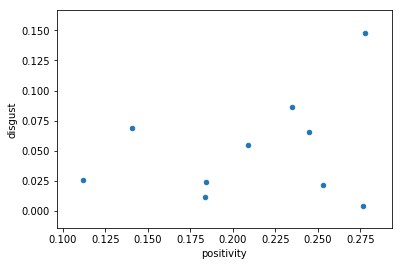

In [18]:
df.plot(x='positivity', y='disgust', kind='scatter')

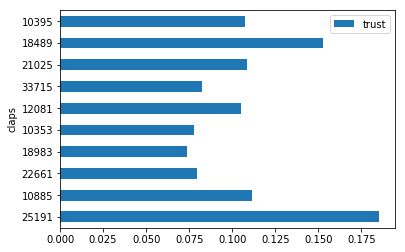

In [50]:
df.plot(x='claps', y='trust', kind='barh')

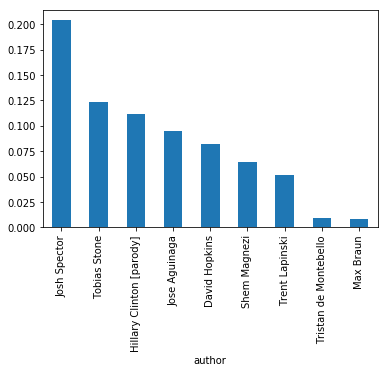

In [43]:
df.groupby('author')['anger'].sum().sort_values(ascending = False).plot(kind='bar')

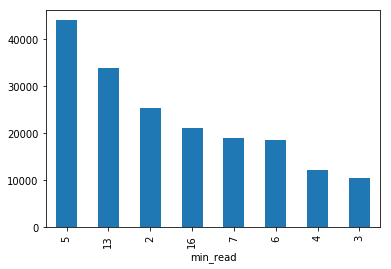

In [44]:
df.groupby('min_read')['claps'].sum().sort_values(ascending = False).plot(kind='bar')

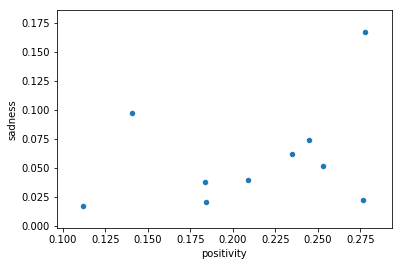

In [20]:
df.plot(x='positivity', y='sadness', kind='scatter')

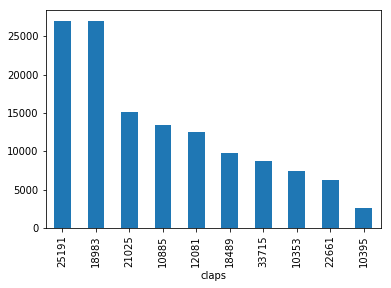

In [53]:
df.groupby('claps')['followers'].sum().sort_values(ascending = False).plot(kind='bar')

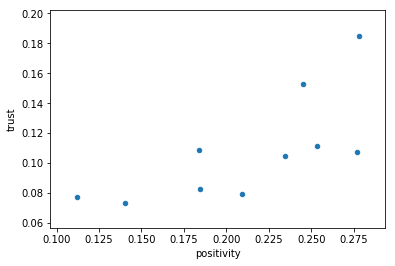

In [23]:
df.plot(x='positivity', y='trust', kind='scatter')

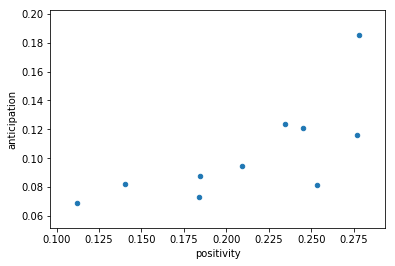

In [24]:
df.plot(x='positivity', y='anticipation', kind='scatter')

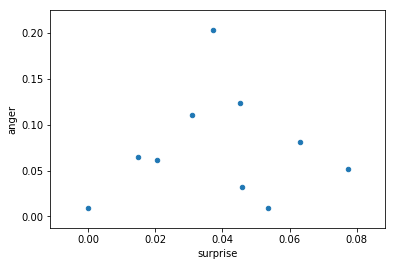

In [25]:
df.plot(x='surprise', y='anger', kind='scatter')

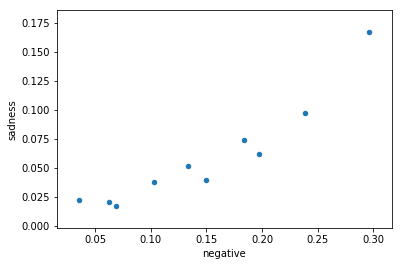

In [26]:
df.plot(x='negative', y='sadness', kind='scatter')

In [30]:
content = df['content']

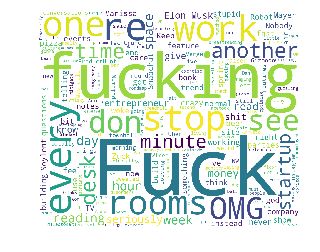

people         0.188162
don            0.117296
time           0.102387
sentence       0.100487
work           0.079408
word           0.078427
world          0.077014
read           0.076115
writing        0.075686
make           0.074412
end            0.072761
trump          0.071569
good           0.063662
social         0.058860
short          0.057228
media          0.056404
shit           0.056315
news           0.055406
day            0.051153
learn          0.049005
stop           0.044876
avoid          0.043118
mirror         0.043103
post           0.043073
words          0.042714
space          0.042065
white          0.040143
experiences    0.039669
code           0.039428
coffee         0.039361
lying          0.038709
things         0.036826
data           0.035439
back           0.034809
country        0.034739
fetch          0.034423
year           0.033817
reality        0.033727
point          0.033207
display        0.032732
writer         0.031911
left           0

In [34]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(
                         stopwords=STOPWORDS,
                         background_color='white',
                         width=1200,
                         height=1000).generate(content[2])

plt.imshow(wordcloud)
plt.axis('off')
plt.show()
 
wordcount_df.sum().sort_values(ascending=False).head(50)

In [55]:
df.to_csv('medium_emotions.csv', index = False, encoding='utf-8')

In [35]:
#day = df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
#df['day'] = df['date'].str.extract('(\d\d\d\d-\d\d?-\d\d)')
#df.head()

In [36]:
#df.groupby('day')['anger'].sum().sort_values(ascending = False).plot(kind='bar')

In [37]:
#df.groupby('day')['positivity'].sum().sort_values(ascending = False).plot(kind='bar')